In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles


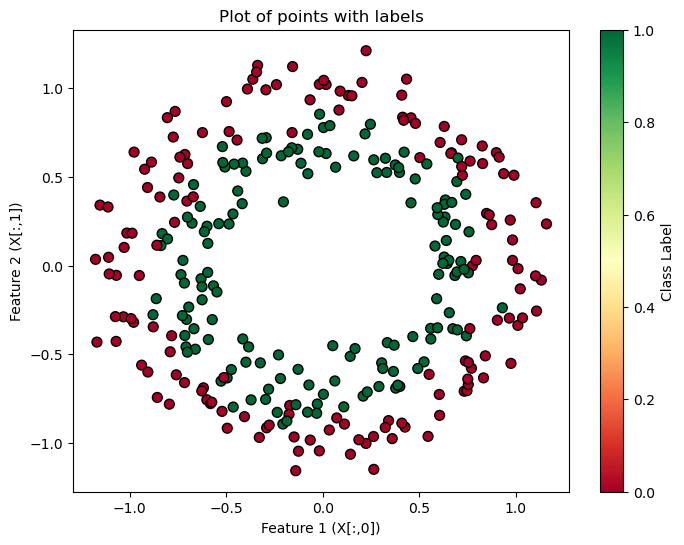

In [2]:

x , y = make_circles(n_samples=300, noise=0.1, factor=0.7 , random_state=0)

plt.figure(figsize=(8,6))
sc = plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlGn ,edgecolors='k' , marker='o' , s=50)
plt.xlabel('Feature 1 (X[:,0])')
plt.ylabel('Feature 2 (X[:,1])')
plt.title('Plot of points with labels')
plt.colorbar(sc, label='Class Label')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive

In [5]:
def update_plot(hidden_layer_sizes):
    
    clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_sizes , ),
                        activation='tanh',max_iter=1000, random_state=1)
    clf.fit(x, y)

    x_vals = np.linspace(x[:,0].min()-0.1, x[:,0].max()+0.1, 100)
    y_vals = np.linspace(x[:,1].min()-0.1, x[:,1].max()+0.1, 100)

    X_plane, Y_plane = np.meshgrid(x_vals, y_vals)

    grid_points = np.c_[X_plane.ravel(), Y_plane.ravel()]
    Z = clf.predict(grid_points)
    Z = Z.reshape(X_plane.shape)

    y_pred = clf.predict(x)
    plt.clf()

    plt.contourf(X_plane, Y_plane, Z, levels=[-0.5, 0.5, 1.5],cmap=plt.cm.RdYlGn, alpha=0.6)

    class_0 = y_pred == 0
    class_1 = y_pred == 1
    plt.scatter(x[class_0, 0], x[class_0, 1], c='red', edgecolors='k', label='Class 0')
    plt.scatter(x[class_1, 0], x[class_1, 1], c='green', edgecolors='k', label='Class 1')
    
    plt.xlabel('Feature 1 (X[:,0])')
    plt.ylabel('Feature 2 (X[:,1])')
    plt.title(f'Decision Boundary with Hidden Layer Size: {hidden_layer_sizes}')
    plt.legend()
    plt.show()